- Many times we get in a dilemma of which machine learning model should we use for a given problem. KFold cross validation allows us to evaluate performance of a model by creating K folds of given dataset. This is better then traditional train_test_split. 

1. option 1 : Use all available data for training and test on same dataset
2. Option 2 : We divide the sample into training and test datasets

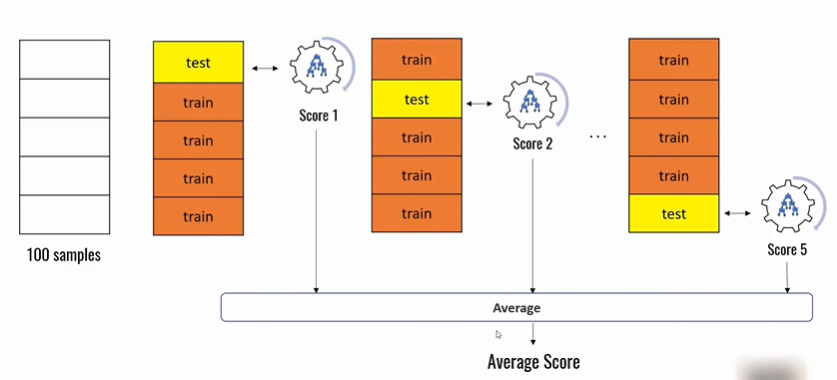

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9462962962962963

In [15]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9814814814814815

In [16]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

In [17]:
from sklearn.model_selection import KFold

In [18]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [19]:
for train_index, test_index in kf.split([1,2, 3, 4, 5, 6, 7, 8, 9]):
    print(train_index, test_index) 

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [20]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
folds = StratifiedKFold(n_splits=3)

In [28]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [29]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [30]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [31]:
scores_rf

[0.9248747913188647, 0.9499165275459098, 0.9265442404006677]

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [35]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [39]:
cross_val_score(RandomForestClassifier(n_estimators=15), digits.data, digits.target)

array([0.90833333, 0.84166667, 0.93593315, 0.93871866, 0.89693593])

### Exercise
- Use iris flower dataset from sklearnn library and use cross_val_score aganist the following models to measure the performance of each
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest

In [41]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
iris = load_iris()

In [43]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [44]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [46]:
from sklearn.model_selection import StratifiedKFold

In [47]:
folds = StratifiedKFold(n_splits=3)

In [48]:
scores_logistic = []
scores_svm = []
scores_dt = []
scores_rf = []


for train_index, test_index in folds.split(iris.data, iris.target):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear', multi_class='ovr'),X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'),X_train, X_test, y_train, y_test))
    scores_dt.append(get_score(DecisionTreeClassifier() ,X_train, X_test, y_train, y_test))
    scores_rf.append(get_score( RandomForestClassifier(n_estimators=40) ,X_train, X_test, y_train, y_test))

In [49]:
scores_logistic

[0.96, 0.96, 0.94]

In [50]:
scores_svm

[0.98, 0.98, 0.96]

In [51]:
scores_dt

[0.98, 0.92, 1.0]

In [52]:
scores_rf

[0.98, 0.94, 0.94]

In [53]:
from sklearn.model_selection import cross_val_score

In [61]:
l_score = cross_val_score(LogisticRegression(), iris.data, iris.target)
l_score

C:\Users\surya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [62]:
np.average(l_score)

0.9733333333333334

In [63]:
svc_score = cross_val_score(SVC(), iris.data, iris.target)
svc_score

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [65]:
np.average(svc_score)

0.9666666666666666

In [66]:
rf_score = cross_val_score(RandomForestClassifier(), iris.data, iris.target, cv=10)
rf_score

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [67]:
np.average(rf_score)

0.96

In [68]:
dt_score = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target)
dt_score

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [69]:
np.average(dt_score)

0.9666666666666668

In [71]:
np.average(l_score), np.average(svc_score), np.average(rf_score), np.average(dt_score)

(0.9733333333333334, 0.9666666666666666, 0.96, 0.9666666666666668)